<h1 style="font-family:'Poppins', Arial, sans-serif; font-weight:700; color:#1e8449; text-align:center; margin-bottom:20px; letter-spacing:1px; font-size:40px;">👨‍💻 Author: <span style="color:#0cd865;">Ali Hassan</span></h1>

<div style="text-align:center; margin-top:20px; line-height:3; font-size:18px;">
  <span style="margin-right:8px;"></span><a href="https://github.com/Ali-Shahzadd"><img src="https://img.shields.io/badge/GitHub-Profile-181717?style=flat-square&logo=github&logoColor=white" alt="GitHub" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.kaggle.com/alihassanshahzad786"><img src="https://img.shields.io/badge/Kaggle-Profile-20BEFF?style=flat-square&logo=kaggle&logoColor=white" alt="Kaggle" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://www.linkedin.com/in/ali-hassan-3952a2290/"><img src="https://img.shields.io/badge/LinkedIn-Profile-0077B5?style=flat-square&logo=linkedin&logoColor=white" alt="LinkedIn" style="height:30px;"></a>
  <span style="margin-left:15px; margin-right:8px;"></span><a href="https://x.com/alishahzadddd?s=21"><img src="https://img.shields.io/badge/Twitter-Profile-1DA1F2?style=flat-square&logo=twitter&logoColor=white" alt="Twitter" style="height:30px;"></a>
</div>



<h1 style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    font-size: 2.5rem;
    font-weight: 700;
    color: #2980b9;
    margin-top: 20px;
    letter-spacing: 1px;
">
    🌧️ Rainfall Prediction
</h1>





| <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnLHNLqEwr39D2rsjm_r49vt1yJc689Y25sQ&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQCzDBNQzaiyBSsGB7AfJ_YAUpozmR_0vg_9w&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQv9pTIYtTvX5q9Mz0SaQdP32_5EYtk4IMWSA&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> | <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ7cutFFncBE51OXt_8tLiAszqgYAbHOAIT2Q&s" alt="Plant" style="width:180px;height:auto;border-radius:8px;box-shadow:0 2px 4px rgba(0,0,0,0.2);margin:5px;"> |
|---|---|---|---|


<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Loading the Data</h3>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import pickle

In [80]:
df=pd.read_csv('rainfall.csv')
df.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [81]:
df.shape

(366, 12)

<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Checking Information</h3>

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [83]:
# Sorting the Columns Unecessary spaces
df.columns=df.columns.str.strip()

<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Checking Null Values</h3>

In [84]:
df.isnull().sum().sort_values(ascending=False)

windspeed        1
winddirection    1
day              0
pressure         0
temparature      0
maxtemp          0
mintemp          0
dewpoint         0
cloud            0
humidity         0
sunshine         0
rainfall         0
dtype: int64

In [85]:
# Imputing the Null Value
df['windspeed']=df['windspeed'].fillna(df['windspeed'].median())
df['winddirection']=df['winddirection'].fillna(df['winddirection'].median())

In [86]:
df.isnull().sum().sort_values(ascending=False)

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [87]:
# Checking the Unique values in Rainfall (Target Variable)
df['rainfall'].unique()

array(['yes', 'no'], dtype=object)

<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Encoding the Categorical Column into Numeric</h3>
<div style="color: rgb(92, 92, 212);font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">
    <li>Rainfall (yes) -------------------------- 1</li>
    <li>Rainfall (no) -------------------------- 0</li>
</div>

In [88]:
# Encoding
df.replace({'rainfall':{'yes':1,'no':0}},inplace=True)
df.head()

C:\Windows\Temp\ipykernel_18176\3053440103.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'rainfall':{'yes':1,'no':0}},inplace=True)


,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


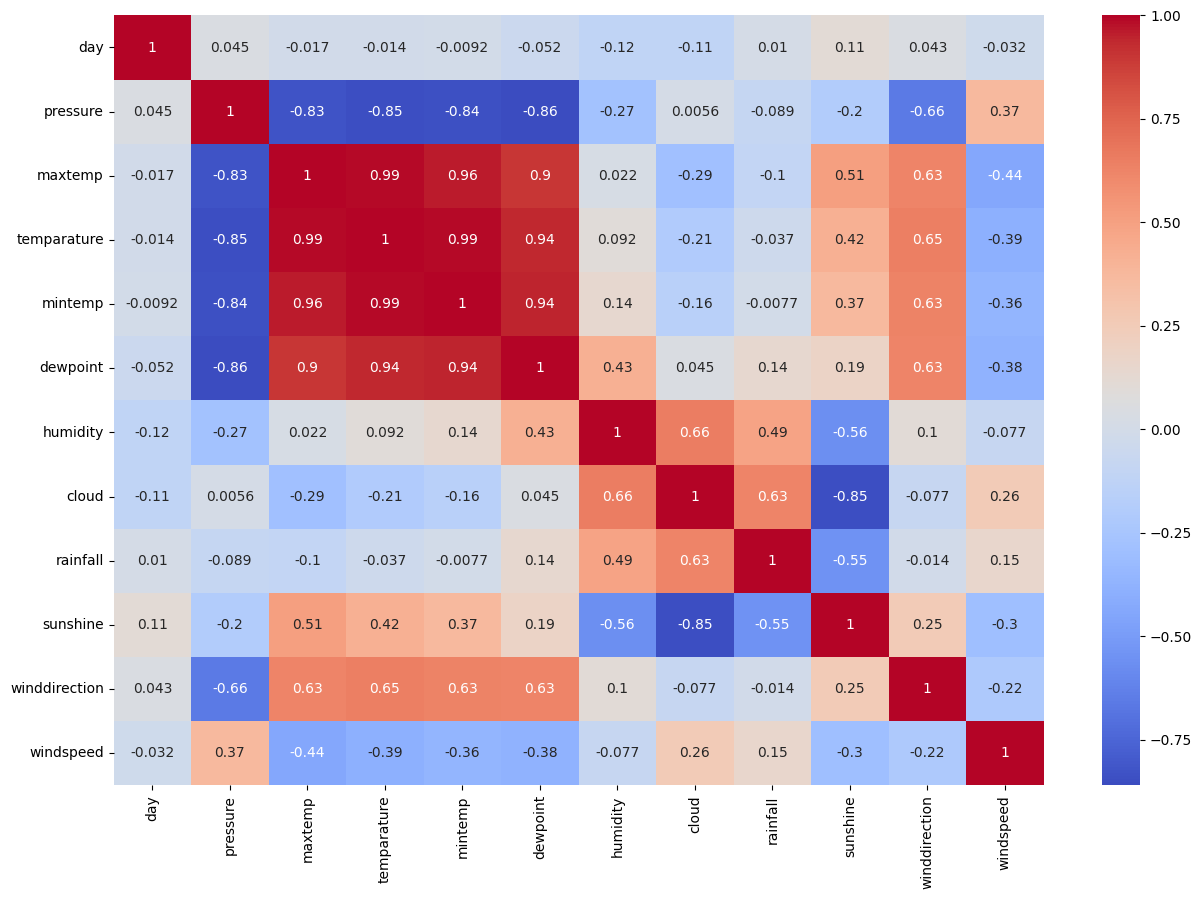

In [89]:
# Making plots for all columns

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [90]:
# Dropping the higly correlated columns
df=df.drop(['maxtemp','mintemp','temparature'],axis=1)
df.head()

,day,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [91]:
# Seperating the majority and minority class

df['rainfall'].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [92]:
df_majority=df[df['rainfall']==1]
df_minority=df[df['rainfall']==0]

print(df_majority.shape)
print(df_minority.shape)

(249, 9)
(117, 9)


In [93]:
# downsample majority class to match minority count
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [ ]:
# Upsampling
# df_minority_upsampled=resample(df_minority,replace=True,n_samples=249,random_state=42)
# df_upsampled=pd.concat([df_majority,df_minority_upsampled])
# df_upsampled['rainfall'].value_counts()

In [95]:
df_downsampled["rainfall"].value_counts()

# Shuffling
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Splitting the Data</h3>

In [99]:
# split features and target as X and y
X = df_downsampled.drop(columns=["rainfall","day"],axis=1)
y = df_downsampled["rainfall"]

In [100]:
# Splitting for training and validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Training the Model</h3>

In [101]:
# Training the Model
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [102]:
# Hypertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [103]:
best_rf_model = grid_search_rf.best_estimator_

print("best parameters for Random Forest:", grid_search_rf.best_params_)

best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [104]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.71052632 0.81578947 0.83783784 0.83783784 0.94594595]
Mean cross-validation score: 0.829587482219061


In [105]:
# test set performance
y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy:", accuracy_score(y_test, y_pred))
print("Test set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test set Accuracy: 0.7446808510638298
Test set Confusion Matrix:
 [[17  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.72      0.78      0.75        23

    accuracy                           0.74        47
   macro avg       0.75      0.75      0.74        47
weighted avg       0.75      0.74      0.74        47



In [106]:
input_data = (1015.9, 19.9, 95, 81, 0.0, 40.0, 13.7)

input_df = pd.DataFrame([input_data], columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine','winddirection', 'windspeed'])


prediction = best_rf_model.predict(input_df)

prediction = best_rf_model.predict(input_df)
print("Prediction result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result: Rainfall


<h3 style="color: blue;font-family: 'Franklin Gothic Medium', 'Arial Narrow', Arial, sans-serif; font-weight: bold;">Saving the Model</h3>

In [107]:
# save model and feature names to a pickle file
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall_prediction_model.pkl", "wb") as file:
  pickle.dump(model_data, file)